In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset

In this homework, we will use the California Housing Prices data set from Kaggle.

In [2]:
ca_housing_dataset_url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
df = pd.read_csv(ca_housing_dataset_url)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df.head(n=10).T

,0,1,2,3,4,5,6,7,8,9
longitude,-122.23,-122.22,-122.24,-122.25,-122.25,-122.25,-122.25,-122.25,-122.26,-122.25
latitude,37.88,37.86,37.85,37.85,37.85,37.85,37.84,37.84,37.84,37.84
housing_median_age,41.0,21.0,52.0,52.0,52.0,52.0,52.0,52.0,42.0,52.0
total_rooms,880.0,7099.0,1467.0,1274.0,1627.0,919.0,2535.0,3104.0,2555.0,3549.0
total_bedrooms,129.0,1106.0,190.0,235.0,280.0,213.0,489.0,687.0,665.0,707.0
population,322.0,2401.0,496.0,558.0,565.0,413.0,1094.0,1157.0,1206.0,1551.0
households,126.0,1138.0,177.0,219.0,259.0,193.0,514.0,647.0,595.0,714.0
median_income,8.3252,8.3014,7.2574,5.6431,3.8462,4.0368,3.6591,3.12,2.0804,3.6912
median_house_value,452600.0,358500.0,352100.0,341300.0,342200.0,269700.0,299200.0,241400.0,226700.0,261100.0
ocean_proximity,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY,NEAR BAY


### Exploratory data analysis

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail?

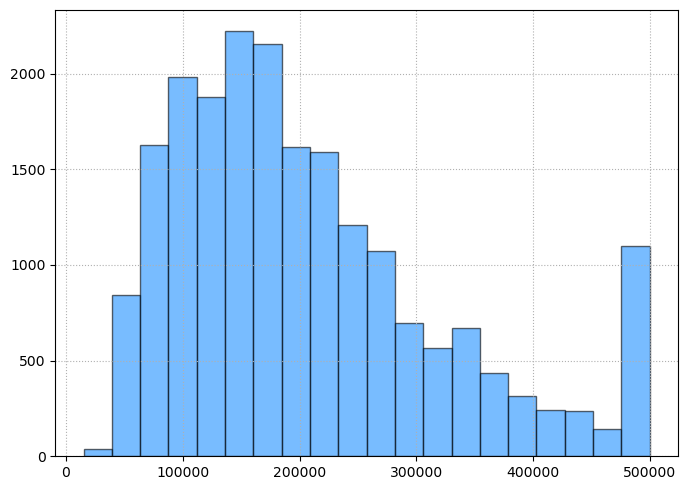

In [5]:
fig, axis = plt.subplots(figsize=(7, 5))
axis.hist(df.median_house_value, color='dodgerblue', edgecolor='k', alpha=0.6, bins=20)
axis.grid(linestyle=':')
fig.tight_layout();

### Preparing the dataset

For this homework, we only want to use a subset of data. First, keep only the records where `ocean_proximity` is either `<1H OCEAN` or `INLAND`.

Here are the first 8 rows of the data frame. The dataframe is rotated on its side to easily visualize the column names.

In [6]:
df = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]

In [7]:
df.head(8).T

,701,830,859,860,861,862,863,870
longitude,-121.97,-121.99,-121.97,-121.96,-121.98,-121.99,-122.0,-121.93
latitude,37.64,37.61,37.57,37.58,37.58,37.58,37.58,37.49
housing_median_age,32.0,9.0,21.0,15.0,20.0,31.0,6.0,5.0
total_rooms,1283.0,3666.0,4342.0,3575.0,4126.0,2878.0,4405.0,1150.0
total_bedrooms,194.0,711.0,783.0,597.0,1031.0,478.0,717.0,311.0
population,485.0,2341.0,2172.0,1777.0,2079.0,1276.0,2071.0,648.0
households,171.0,703.0,789.0,559.0,975.0,485.0,688.0,245.0
median_income,6.0574,4.6458,4.6146,5.7192,3.6832,6.2073,5.8151,3.5714
median_house_value,431000.0,217000.0,247600.0,283500.0,216900.0,282500.0,295600.0,300000.0
ocean_proximity,<1H OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN,<1H OCEAN


Here are the last 8 rows of the data frame.

In [8]:
df.tail(8).T

,20632,20633,20634,20635,20636,20637,20638,20639
longitude,-121.45,-121.53,-121.56,-121.09,-121.21,-121.22,-121.32,-121.24
latitude,39.26,39.19,39.27,39.48,39.49,39.43,39.43,39.37
housing_median_age,15.0,27.0,28.0,25.0,18.0,17.0,18.0,16.0
total_rooms,2319.0,2080.0,2332.0,1665.0,697.0,2254.0,1860.0,2785.0
total_bedrooms,416.0,412.0,395.0,374.0,150.0,485.0,409.0,616.0
population,1047.0,1082.0,1041.0,845.0,356.0,1007.0,741.0,1387.0
households,385.0,382.0,344.0,330.0,114.0,433.0,349.0,530.0
median_income,3.125,2.5495,3.7125,1.5603,2.5568,1.7,1.8672,2.3886
median_house_value,115600.0,98300.0,116800.0,78100.0,77100.0,92300.0,84700.0,89400.0
ocean_proximity,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND,INLAND


Only use the following columns: `latitude`, `longitude`, `housing_median_age`, `total_rooms`, `total_bedrooms`, `population`, `households`, `median_income`, `median_house_value`. These columns are of dtype _float64_.

In [9]:
num_cols = df.select_dtypes('float64').columns

In [10]:
df = df[num_cols]

### Question 1

There's one feature with missing values. What is it?

In [11]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `population`?

In [12]:
df.population.median()

1195.0

### Prepare and split the dataset

* Shuffle the initial dataset, use seed `42`.
* Split your data in _train_ / _val_ / _test_ sets, with 60% / 20% / 20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.


In [13]:
X_full, y_full = df.drop('median_house_value', axis=1), df.median_house_value
y_full = np.log1p(y_full)

In [14]:
def split_train_val_test(X, y, size):
    n = X.shape[0]
    num_val = int(n * size)
    num_test = int(n * size)
    num_train = n - num_val - num_test
    np.random.seed(42)
    idx = np.arange(n)
    np.random.shuffle(idx)
    X_train, y_train = X.iloc[idx[:num_train]], y.iloc[idx[:num_train]]
    X_val, y_val = X.iloc[idx[num_train:num_train+num_val]], y.iloc[idx[num_train:num_train+num_val]]
    X_test, y_test = X.iloc[idx[num_train+num_val:]], y.iloc[idx[num_train+num_val:]]
    return X_train, y_train, X_val, y_val, X_test, y_test

In [15]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    X_inv = np.linalg.inv(np.dot(X.T, X))
    w = np.dot(np.dot(X_inv, X.T), y)
    return w[0], w[1:]

In [16]:
def X_fillna_with_val(X, column, value):
    X = X.copy()
    X[column] = X[column].fillna(value)
    return X

In [17]:
def rmse(y, y0):
    return round(np.sqrt(((y - y0) ** 2).mean()), 2)

In [18]:
def calculate_rmse(X, y):
    w0, w = train_linear_regression(X, y)
    y_pred = w0 + X.dot(w)
    return y_pred, rmse(y_pred, y)

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`.
* Which option gives better RMSE?

#### First option: fill with 0

In [19]:
X_full_0 = X_fillna_with_val(X_full, 'total_bedrooms', 0)

In [20]:
y_pred_0, rmse_0 = calculate_rmse(X_full_0, y_full)
rmse_0

0.34

#### Second option: fill with mean (use only training data)

In [21]:
mean_bedroom = X_full.total_bedrooms.mean()
X_full_mean = X_fillna_with_val(X_full, 'total_bedrooms', mean_bedroom)

In [22]:
X_train, y_train, X_val, y_val, X_test, y_test = split_train_val_test(X_full_mean, y_full, 0.2)

In [23]:
y_pred_mean, rmse_mean = calculate_rmse(X_train, y_train)
rmse_mean

0.34

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

#### Options:

* 0
* 0.000001
* 0.001
* 0.0001